# Particle Image Velocimetry

In this notebook we summarize the use of `majordome.piv` wrapper around [OpenPIV](https://github.com/OpenPIV/openpiv-python).

We start by importing all required tools for management and workflow.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]

In [2]:
from pathlib import Path
from majordome.piv import PivConfig
from majordome.piv import piv_workflow
from majordome.piv import plot_mean_speed

In the next cell we provide (with units/comments) all the required configuration parameters.

In [3]:
# Frames per second [1/s].
fps = 900

# Image scaling factor [mm/pixel].
scaling_factor = 1

# Interrogation window size in first frame [pixel].
window_size = 32

# Overlapping between two adjacent windows [pixel].
overlap = window_size // 2

# Size of interrogation window in second frame [pixel].
search_area_size = window_size + overlap

# Number of images to skip at each step.
every = 1

# Directory containing image sequence.
input_dir = Path("media/017-Particle-Image-Velocimetry/")

The wrapper does not manage path, so it is up to the user to provide a valid output directory.

It is recommended to do this outside of the working directory to avoid a *dump mess*.

In [4]:
# Interpolate name of output directory.
outname = f"{every:d}-overlap-{overlap:d}-ws-{window_size:d}"

# Name and ensure existence of output directory.
output_dir = Path(f"dumps/{outname}")
output_dir.mkdir(exist_ok=True, parents=True)

Finally a configuration is prepared and the workflow is run.

In the end the user can retrieve a data frame with individual image statistics.

In [5]:
# Create generator for list of images to treat.
images = sorted(input_dir.glob("*.tif"))

# Create configuration for workflow.
conf = PivConfig(
    time_step=every * (1.0 / fps),
    scaling_factor=scaling_factor,
    window_size=window_size,
    search_area_size=search_area_size,
    overlap=overlap
)

# Run images treatment workflow.
df = piv_workflow(conf, images, output_dir, every=every)

|████████████████████████████████████████| 100% [run 1.04e+02s | eta 2.60e-06s]
Took 104.04082329999983s


Results can be used to display projected speed in time, *e.g.* for validation of a CFD simulation.

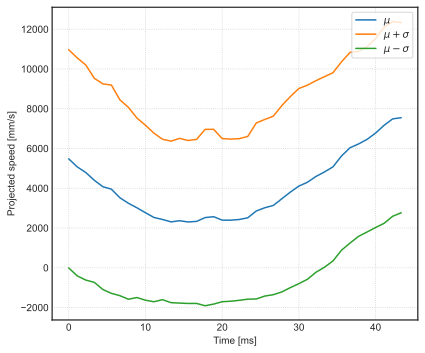

In [6]:
# Display mean speed diagram.
fig = plot_mean_speed(df, add_bounds=True)
fig.savefig(output_dir / f"series_every_{every}.png", dpi=200)

You can also inspect the table for further processing or simply dump it to a file.

Below you have an overview of currently available outputs.

In [7]:
df.head()

,t,u_mean,u_std,v_mean,v_std,s_mean,s_std
0,0.000000,-1352.269612,5602.053279,782.789422,5129.890340,5476.431913,5488.720754
1,0.001111,-1195.983983,5353.822696,947.773185,4978.576520,5071.597789,5480.677383
2,0.002222,-1030.933114,5195.081193,750.471792,4858.438471,4790.115129,5408.925281
3,0.003333,-1133.789967,4751.659120,630.248162,4629.919019,4398.065853,5132.202672
4,0.004444,-1021.714886,4778.295874,513.731352,4385.863647,4077.395934,5170.869858
